In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
Data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/Cust_Segmentation.csv',sep=',')
Data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [36]:
Data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [37]:
Data.tail()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9
849,850,52,1,16,64,1.866,3.638,0.0,NBA025,8.6


In [38]:
Data.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [40]:
Data.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [41]:
Mean_value = Data['Defaulted'].mean()
Mean_value

0.26142857142857145

In [42]:
Data['Defaulted'].fillna(Mean_value,inplace=True)

In [43]:
Data.isna().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [45]:
Data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.000000,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.000000,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.000000,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.000000,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.000000,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,0.261429,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.000000,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.000000,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.000000,NBA012,2.9


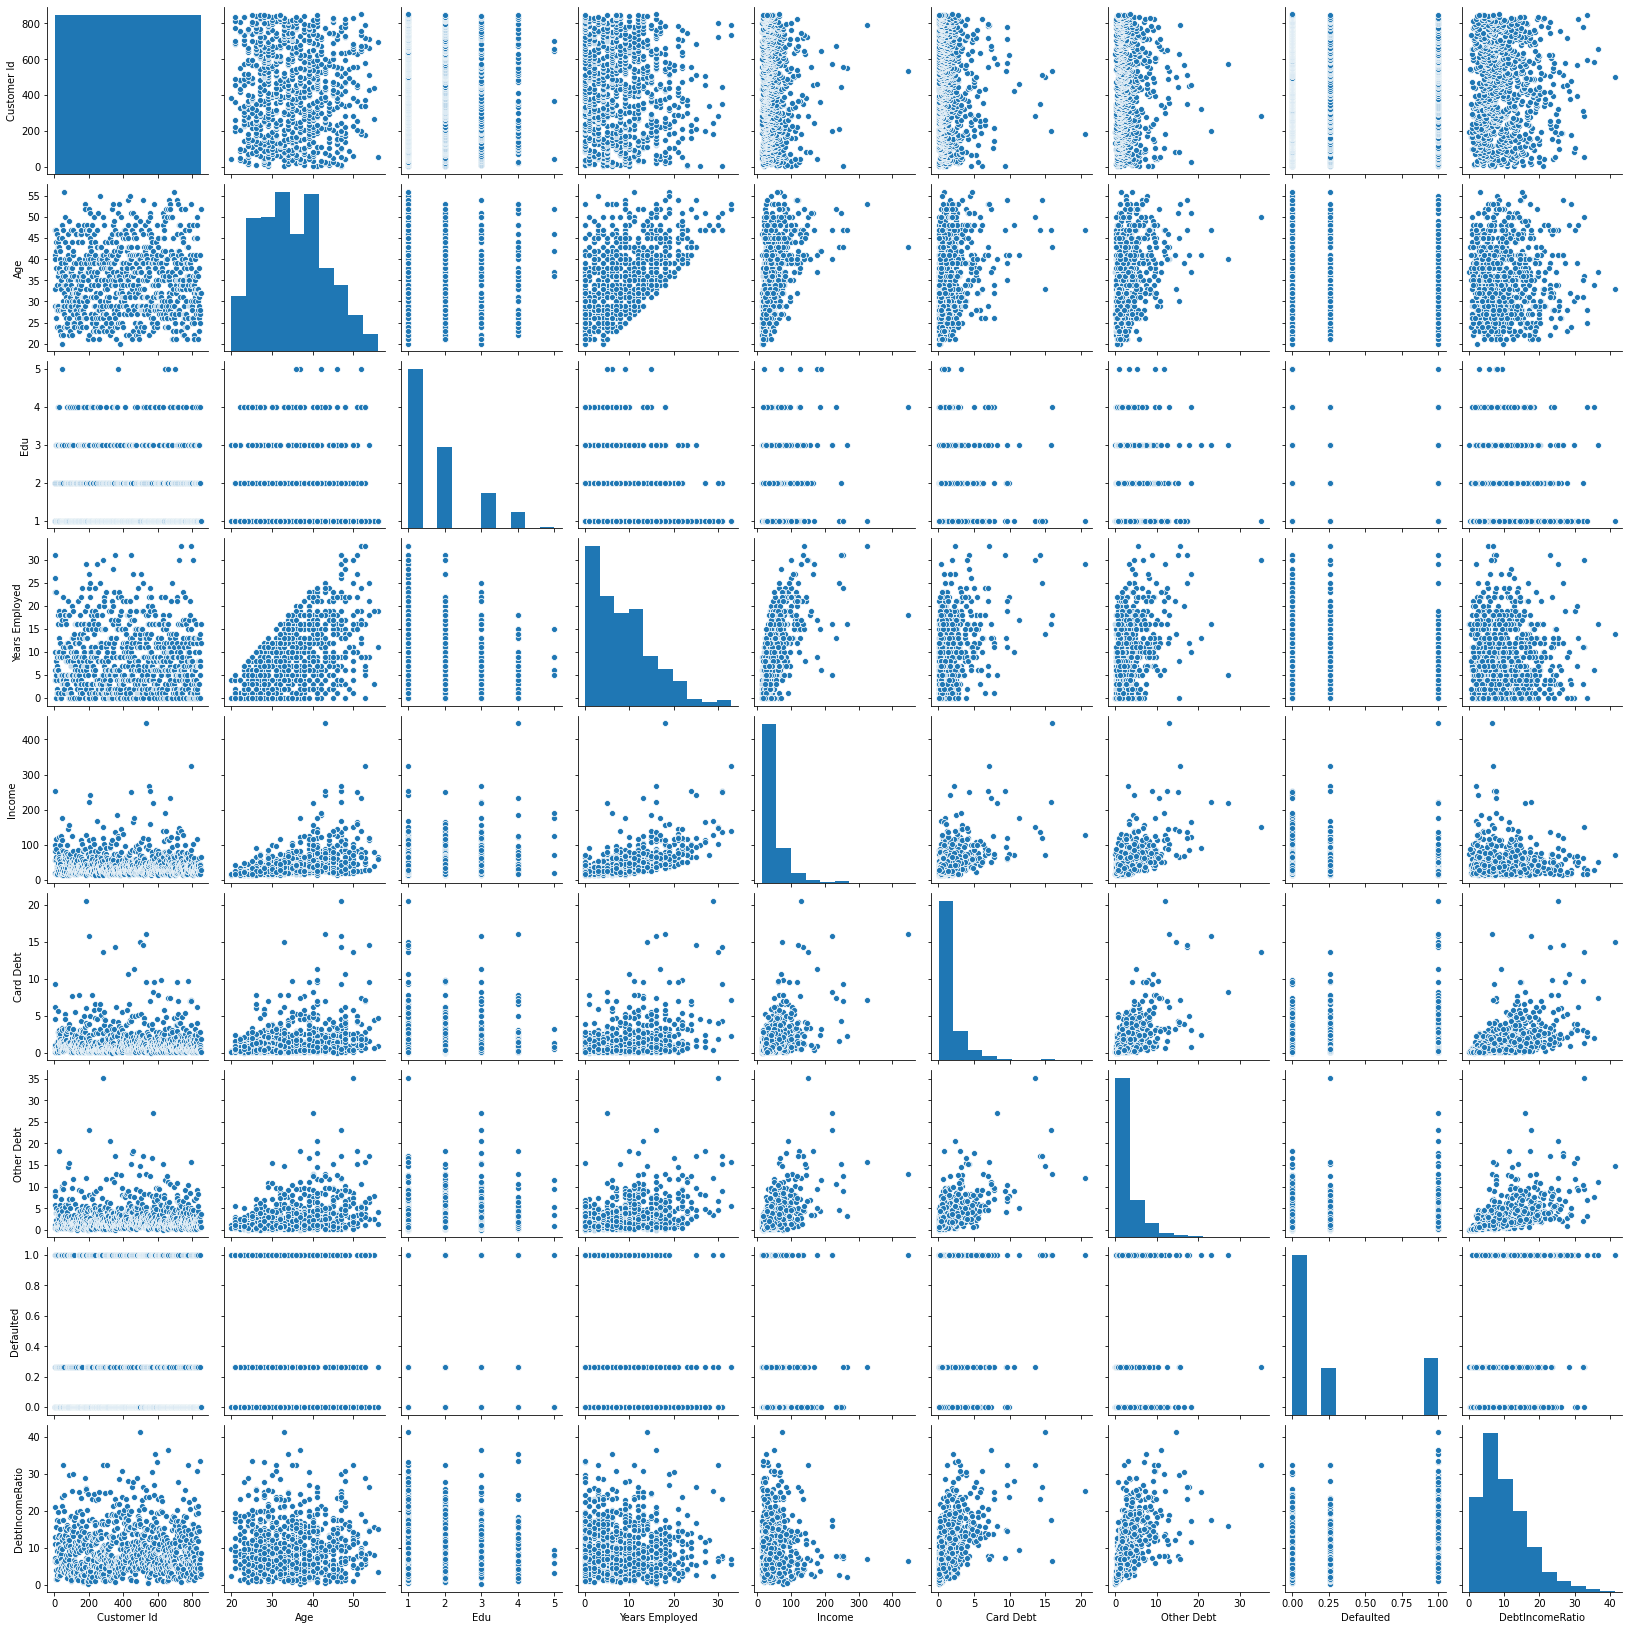

In [46]:
sns.pairplot(Data)

In [47]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()

In [55]:
Data['Address'] = le.fit_transform(Data['Address'])
Data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.000000,1,6.3
1,2,47,1,26,100,4.582,8.218,0.000000,21,12.8
2,3,33,2,10,57,6.111,5.802,1.000000,13,20.9
3,4,29,2,4,19,0.681,0.516,0.000000,9,6.3
4,5,47,1,31,253,9.308,8.908,0.000000,8,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,0.261429,7,6.8
846,847,28,2,7,34,0.359,2.021,0.000000,2,7.0
847,848,25,4,0,18,2.802,3.210,1.000000,1,33.4
848,849,32,1,12,28,0.116,0.696,0.000000,12,2.9


In [57]:
X = Data.drop(['DebtIncomeRatio'],axis=1)

In [58]:
y = Data.DebtIncomeRatio

In [59]:
y

0       6.3
1      12.8
2      20.9
3       6.3
4       7.2
       ... 
845     6.8
846     7.0
847    33.4
848     2.9
849     8.6
Name: DebtIncomeRatio, Length: 850, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

In [63]:
X_train.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address
813,814,31,1,10,49,3.237,1.565,1.000000,12
467,468,32,1,3,23,0.053,1.373,0.000000,10
45,46,45,3,9,84,1.276,9.728,0.261429,0
580,581,39,1,19,60,9.593,6.667,1.000000,15
680,681,37,1,12,44,2.995,3.473,0.000000,14


In [64]:
X_test.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address
177,178,26,1,7,22,0.209,0.913,0.0,3
260,261,40,1,3,23,0.409,1.178,0.0,13
529,530,36,1,4,17,0.521,2.420,0.0,15
763,764,39,2,16,69,1.061,0.595,0.0,13
450,451,41,3,12,86,4.991,17.799,1.0,11


In [65]:
X_train.shape

(595, 9)

In [66]:
y_train.shape

(595,)

In [67]:
X_test.shape

(255, 9)

In [86]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [93]:
model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
finalpred=(pred1+pred2)/2
finalpred

array([ 7.70431638,  8.64050905, 11.10502057,  2.98159609, 31.73530688,
        5.86045697, 10.1808162 ,  6.92487845,  9.64352357, 19.8407552 ,
       12.55301187,  8.59461658, 17.21191705, 12.62898857,  6.41680006,
       11.86700029,  6.37919883,  7.69696473,  9.41453136, 17.52825857,
        9.53489275, 15.25746146, 13.23086649, 11.25992961,  6.51109961,
        9.61070499,  9.30261917, 13.85735353,  7.4546243 ,  9.06116818,
       10.39031477,  8.06946385,  8.44931473,  6.95541039,  9.7318693 ,
        7.25924018,  9.541413  ,  6.81241401, 12.9879606 ,  4.5778501 ,
        8.4001195 ,  7.81860932, 12.77124063, 11.78872051, 13.85282414,
       10.14897583, -0.69355979, 11.41707746, 10.62539505, 14.26874507,
       12.02413208, 16.87714667,  8.11307526,  9.60508408,  7.82792539,
        9.15080418,  8.00678315,  8.6535765 , 16.01042036, 15.67527852,
       10.47612669, 12.18756871,  5.76258313,  3.78199372,  9.64463761,
        7.54273801, 10.63184153,  7.47843701,  5.59703304, 13.13

In [96]:
model3 = linear_model.LassoCV()
model4 = linear_model.LassoCV()
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

pred3=model3.predict(X_test)
pred4=model4.predict(X_test)

finalpred=(pred3+pred4)/2
finalpred

array([ 7.77973714,  8.7012619 , 11.15867426,  3.00953704, 31.56566613,
        5.89122315, 10.01833601,  6.901741  ,  9.64930959, 19.90919438,
       12.38887875,  8.63724671, 17.01768045, 12.430012  ,  6.43038598,
       11.70248209,  6.46647281,  7.74527445,  9.43856074, 17.58159629,
        9.59870922, 15.07614127, 13.20540668, 11.09449244,  6.55923293,
        9.68894955,  9.39263849, 13.88229063,  7.47760346,  9.06593156,
       10.19443834,  8.14466331,  8.48519985,  7.03054321,  9.55530103,
        7.18612268,  9.63892693,  6.79743215, 12.82880195,  4.65743847,
        8.50140596,  7.89679294, 12.85641981, 11.7903418 , 13.61246926,
       10.12902009, -0.66464996, 11.26261235, 10.43808808, 14.34369391,
       12.05344854, 16.89769561,  8.19760803,  9.6121608 ,  7.86671463,
        9.24070285,  8.0817901 ,  8.72077477, 15.9582517 , 15.74358134,
       10.56377842, 12.02059471,  5.77949275,  3.81864949,  9.67046962,
        7.59879534, 10.45175635,  7.58060382,  5.65477235, 12.96

In [75]:
model5 = linear_model.RidgeCV()
model6 = linear_model.RidgeCV()
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)

pred5=model5.predict(X_test)
pred6=model6.predict(X_test)

finalpred=(pred5+pred6)/2
finalpred

array([ 7.76395799,  8.71640055, 11.17075764,  2.99317025, 31.59066725,
        5.87589918, 10.02015321,  6.92016407,  9.65875408, 19.92014497,
       12.39053018,  8.66014987, 17.04067418, 12.4639337 ,  6.42586607,
       11.70108033,  6.45999209,  7.75910235,  9.43709095, 17.61556334,
        9.60837272, 15.08195811, 13.23355118, 11.08681567,  6.54753018,
        9.68051201,  9.38215963, 13.89666611,  7.49000571,  9.05882208,
       10.19285665,  8.15485576,  8.4784005 ,  7.01430801,  9.55767156,
        7.19716879,  9.64254745,  6.78396292, 12.83056061,  4.63279789,
        8.49373963,  7.89480068, 12.85861498, 11.81212108, 13.62848966,
       10.14958131, -0.69946348, 11.26157569, 10.45103224, 14.32597073,
       12.04529055, 16.89743695,  8.17980414,  9.62542328,  7.84886433,
        9.23541832,  8.06361651,  8.74073147, 15.9498396 , 15.74980088,
       10.55205739, 12.01866122,  5.76869737,  3.80010952,  9.67952387,
        7.58688146, 10.45395829,  7.56962944,  5.62541376, 12.96

In [95]:
print("Train score of First model is",model1.score(X_train,y_train))
print("Train score of Second model is",model2.score(X_train,y_train))
print('*'*30)
print("Test score of First model is",model1.score(X_test,pred1))
print("Test score of First model is",model2.score(X_test,pred2))

Train score of First model is 0.662186115987226
Train score of Second model is 0.662186115987226
******************************
Test score of First model is 1.0
Test score of First model is 1.0


In [97]:
print("Train score of First model is",model3.score(X_train,y_train))
print("Train score of Second model is",model4.score(X_train,y_train))
print('*'*30)
print("Test score of First model is",model3.score(X_test,pred3))
print("Test score of First model is",model4.score(X_test,pred4))

Train score of First model is 0.6619875160742208
Train score of Second model is 0.6619875160742208
******************************
Test score of First model is 1.0
Test score of First model is 1.0


In [98]:
print("Train score of First model is",model5.score(X_train,y_train))
print("Train score of Second model is",model6.score(X_train,y_train))
print('*'*30)
print("Test score of First model is",model5.score(X_test,pred3))
print("Test score of First model is",model6.score(X_test,pred4))

Train score of First model is 0.6620050414143837
Train score of Second model is 0.6620050414143837
******************************
Test score of First model is 0.9999885502055299
Test score of First model is 0.9999885502055299


In [99]:
y_test.shape

(255,)

In [100]:
finalpred.shape

(255,)

In [101]:
print(mean_squared_error(y_test, finalpred, sample_weight=None, multioutput='uniform_average'))

8.780799345214254


In [102]:
from sklearn.metrics import mean_squared_error,r2_score

In [103]:
mean_squared_error(y_test,finalpred)

8.780799345214254

In [104]:
r2_score(y_test,finalpred)

0.7435870235409933

In [106]:
model1.score(X_train,y_train)

0.662186115987226

In [107]:
model1.score(X_test,y_test)

0.7425761625579834

In [108]:
model2.score(X_train,y_train)

0.662186115987226

In [109]:
model2.score(X_test,y_test)

0.7425761625579834